In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as stats
from tabulate import tabulate
import seaborn as sns
from scipy.stats import wilcoxon

The purpose of this project is to explore the features of music from Spotify. I decided to choose a piece of the discography of a great, british band - The Cure. 

PLAN OF THE PROJECT:
- Based on feature Popularity, the new feature TopPopularity is made. Songs which Popularity is above 35 are labeled as 1 (popular) and the rest is labeled as 0 (unpopular). My goal was to compare popular and unpopular songs,
- Data is divided using train_test_split function,
- Based on training dataset, I compared the distribution of quantitative variables in the popular and unpopular gropus of songs,
- Correlation Matrix,
- The KNN model, which goal is to predict if a song form the test dataset is popular or unpopuar.


In [2]:
current_dir = Path.cwd()
col_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,14]
thecure_df = pd.read_csv(current_dir/"thecure.csv",usecols=col_list,sep=';', header=0) 
thecure_df.reset_index(drop=True, inplace=True) 
thecure_df

,Song_title,Album,Artist,Release_date,Length (ms),Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo
0,Plainsong - Remastered,Disintegration,The Cure,1989,317346,48,0.361,0.00451,0.428,0.660000,0.0879,-9.282,0.0306,86.884
1,Pictures Of You - Remastered,Disintegration,The Cure,1989,448306,61,0.476,0.00325,0.764,0.112000,0.1380,-6.454,0.0320,171.903
2,Closedown - Remastered 2010,Disintegration,The Cure,1989,258346,43,0.521,0.31900,0.755,0.769000,0.1290,-7.223,0.0272,93.986
3,Lovesong - Remastered,Disintegration,The Cure,1989,208266,66,0.611,0.32600,0.791,0.862000,0.2170,-7.700,0.0286,140.120
4,Last Dance - Remastered,Disintegration,The Cure,1989,283880,38,0.331,0.47400,0.772,0.576000,0.3380,-6.376,0.0546,184.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Wailing Wall - Studio Alternative Mix,The Top,The Cure,1984,297386,10,0.314,0.31200,0.788,0.802000,0.1350,-8.351,0.0817,175.148
135,The Empty World - Live Bootleg,The Top,The Cure,1984,167360,10,0.454,0.08090,0.803,0.000005,0.9010,-8.476,0.0462,94.121
136,Bananafishbones - Live Bootleg,The Top,The Cure,1984,177520,10,0.427,0.00745,0.886,0.000000,0.9350,-6.807,0.1050,81.725
137,The Top - Live Bootleg,The Top,The Cure,1984,431320,10,0.360,0.05240,0.756,0.000027,0.9510,-7.770,0.0501,125.480


In [3]:
#If the song has Popularity above 35 it is labeles as 1
labels = []
index_of_pop = []
for index, row in thecure_df.iterrows():
    if row['Popularity'] > 35:
        thecure_df.loc[index,'TopPopularity'] = 1
        labels.append(1) 
        index_of_pop.append(index) 
        #print (row['Song_title'], thecure_df.loc[index,'TopPopularity'])
    else:
        thecure_df.loc[index,'TopPopularity'] = 0
        labels.append(0) 
        
print((len(index_of_pop)/len(labels))*100) #percentage of songs classified as popular 

33.093525179856115


In [4]:
X_train, X_test, y_train, y_test = train_test_split(thecure_df, labels, test_size=0.2, random_state=42, stratify=labels)
X_train_pop = []
X_train_unpop = []

for index, row in X_train.iterrows():
    if row['TopPopularity'] == 1:
        X_train_pop.append(index)
    else:
        X_train_unpop.append(index)

X_train2=X_train.drop(labels=["Song_title","Album","Artist","Release_date","Length (ms)","Popularity","TopPopularity"],axis=1)    
X_test2=X_test.drop(labels=["Song_title","Album","Artist","Release_date","Length (ms)","Popularity","TopPopularity"],axis=1)    


C:\Users\Ola\anaconda3\envs\PUM\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tempo'>

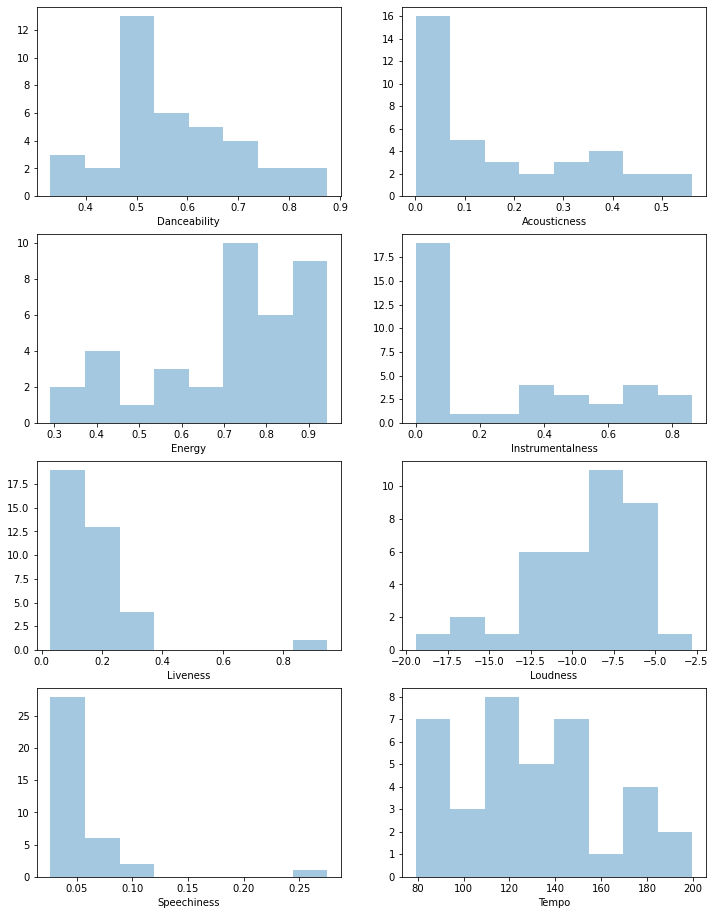

In [5]:
b=8
#histograms for popular songs in X_train
plt.figure(figsize=(12,16))
plt.subplot(4,2,1)
sns.distplot(a=thecure_df.loc[X_train_pop,"Danceability"], hist=True, bins=b, kde=False)
plt.subplot(4,2,2)
sns.distplot(a=thecure_df.loc[X_train_pop,"Acousticness"], hist=True, bins=b, kde=False)
plt.subplot(4,2,3)
sns.distplot(a=thecure_df.loc[X_train_pop,"Energy"], hist=True, bins=b, kde=False)
plt.subplot(4,2,4)
sns.distplot(a=thecure_df.loc[X_train_pop,"Instrumentalness"], hist=True, bins=b, kde=False)
plt.subplot(4,2,5)
sns.distplot(a=thecure_df.loc[X_train_pop,"Liveness"], hist=True, bins=b, kde=False)
plt.subplot(4,2,6)
sns.distplot(a=thecure_df.loc[X_train_pop,"Loudness"], hist=True, bins=b, kde=False)
plt.subplot(4,2,7)
sns.distplot(a=thecure_df.loc[X_train_pop,"Speechiness"], hist=True, bins=b, kde=False)
plt.subplot(4,2,8)
sns.distplot(a=thecure_df.loc[X_train_pop,"Tempo"], hist=True, bins=b, kde=False)

In [6]:
#shapiro-wilk test for popular songs
mydata = [ [0]*3 for i in range(8)]
counter = 0
head = ["Feature","p", "W"]
variables = ["Danceability", "Acousticness", "Energy", "Instrumentalness", "Liveness", "Loudness", "Speechiness", "Tempo"]

for variable in variables: 
    W,p = stats.shapiro(thecure_df.loc[X_train_pop,variable])
    mydata[counter][0]=variable
    mydata[counter][1]=p
    mydata[counter][2]=W
    counter=counter+1

print(tabulate(mydata, headers=head, tablefmt="grid"))

+------------------+-------------+----------+
| Feature          |           p |        W |
+==================+=============+==========+
| Danceability     | 0.328981    | 0.966822 |
+------------------+-------------+----------+
| Acousticness     | 0.000124433 | 0.845596 |
+------------------+-------------+----------+
| Energy           | 0.00643036  | 0.911925 |
+------------------+-------------+----------+
| Instrumentalness | 1.75561e-05 | 0.806378 |
+------------------+-------------+----------+
| Liveness         | 1.82042e-08 | 0.627599 |
+------------------+-------------+----------+
| Loudness         | 0.054752    | 0.942337 |
+------------------+-------------+----------+
| Speechiness      | 1.77163e-09 | 0.549929 |
+------------------+-------------+----------+
| Tempo            | 0.282449    | 0.964649 |
+------------------+-------------+----------+


H0: Feature has a normal distribution.

H1: Feature doesn't have a normal distribution.

Significance level = 0,05. 

The majority of the features doesn't have a normal distribution. The only features that have a normal distribution are Danceability, Tempo and Loudness.

<AxesSubplot:xlabel='Tempo'>

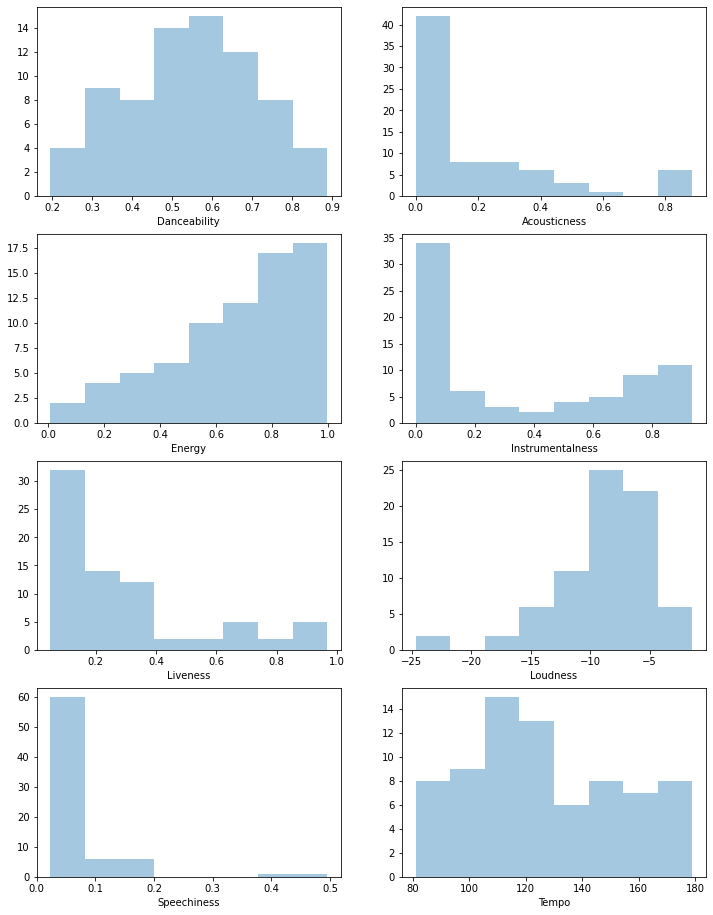

In [7]:
b=8
#histograms for unpopular songs in X_train
plt.figure(figsize=(12,16))
plt.subplot(4,2,1)
sns.distplot(a=thecure_df.loc[X_train_unpop,"Danceability"], hist=True, bins=b, kde=False)
plt.subplot(4,2,2)
sns.distplot(a=thecure_df.loc[X_train_unpop,"Acousticness"], hist=True, bins=b, kde=False)
plt.subplot(4,2,3)
sns.distplot(a=thecure_df.loc[X_train_unpop,"Energy"], hist=True, bins=b, kde=False)
plt.subplot(4,2,4)
sns.distplot(a=thecure_df.loc[X_train_unpop,"Instrumentalness"], hist=True, bins=b, kde=False)
plt.subplot(4,2,5)
sns.distplot(a=thecure_df.loc[X_train_unpop,"Liveness"], hist=True, bins=b, kde=False)
plt.subplot(4,2,6)
sns.distplot(a=thecure_df.loc[X_train_unpop,"Loudness"], hist=True, bins=b, kde=False)
plt.subplot(4,2,7)
sns.distplot(a=thecure_df.loc[X_train_unpop,"Speechiness"], hist=True, bins=b, kde=False)
plt.subplot(4,2,8)
sns.distplot(a=thecure_df.loc[X_train_unpop,"Tempo"], hist=True, bins=b, kde=False)

In [8]:
#shapiro-wilk test for unpopular songs
mydata2 = [ [0]*3 for i in range(8)]
counter = 0
head = ["Feature","p", "W"]
variables = ["Danceability", "Acousticness", "Energy", "Instrumentalness", "Liveness", "Loudness", "Speechiness", "Tempo"]

for variable in variables: 
    W,p = stats.shapiro(thecure_df.loc[X_train_unpop,variable])
    mydata2[counter][0]=variable
    mydata2[counter][1]=p
    mydata2[counter][2]=W
    counter=counter+1

print(tabulate(mydata2, headers=head, tablefmt="grid"))

+------------------+-------------+----------+
| Feature          |           p |        W |
+==================+=============+==========+
| Danceability     | 0.707471    | 0.98791  |
+------------------+-------------+----------+
| Acousticness     | 5.46355e-10 | 0.746153 |
+------------------+-------------+----------+
| Energy           | 0.000414175 | 0.928108 |
+------------------+-------------+----------+
| Instrumentalness | 1.22645e-08 | 0.799868 |
+------------------+-------------+----------+
| Liveness         | 4.84502e-09 | 0.784689 |
+------------------+-------------+----------+
| Loudness         | 1.0051e-05  | 0.890363 |
+------------------+-------------+----------+
| Speechiness      | 4.35823e-14 | 0.525675 |
+------------------+-------------+----------+
| Tempo            | 0.0133699   | 0.957131 |
+------------------+-------------+----------+


H0: Feature has a normal distribution.

H1: Feature doesn't have a normal distribution.

Significance level = 0,05. 

The majority of the features doesn't have a normal distribution. The only features that have a normal distribution are Danceability and Tempo.

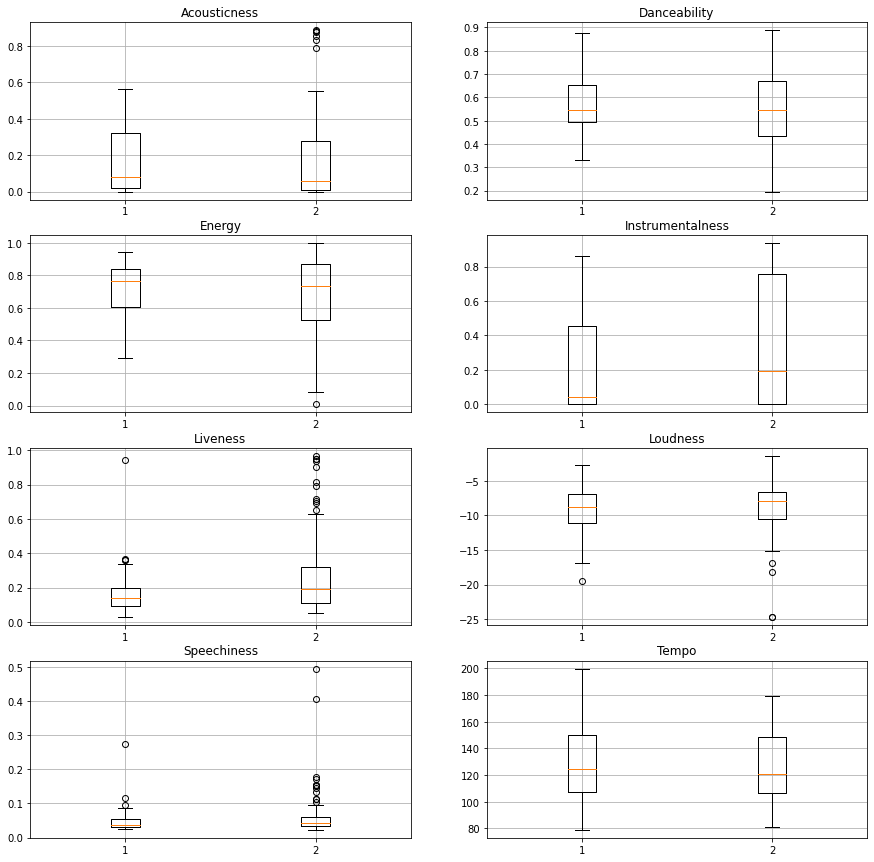

In [9]:
df=thecure_df.loc[X_train_pop]
df2=thecure_df.loc[X_train_unpop]

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2,figsize=(15,15))

t=[df['Acousticness'],df2['Acousticness']]
ax1.boxplot(t)
ax1.set_title('Acousticness')
ax1.grid()

t=[df['Danceability'],df2['Danceability']]
ax2.boxplot(t)
ax2.set_title('Danceability')
ax2.grid()

t=[df['Energy'],df2['Energy']]
ax3.boxplot(t)
ax3.set_title('Energy')
ax3.grid()

t=[df['Instrumentalness'],df2['Instrumentalness']]
ax4.boxplot(t)
ax4.set_title('Instrumentalness')
ax4.grid()

t=[df['Liveness'],df2['Liveness']]
ax5.boxplot(t)
ax5.set_title('Liveness')
ax5.grid()

t=[df['Loudness'],df2['Loudness']]
ax6.boxplot(t)
ax6.set_title('Loudness')
ax6.grid()

t=[df['Speechiness'],df2['Speechiness']]
ax7.boxplot(t)
ax7.set_title('Speechiness')
ax7.grid()

t=[df['Tempo'],df2['Tempo']]
ax8.boxplot(t)
ax8.set_title('Tempo')
ax8.grid()

plt.show()

Based on the figures above, the popular songs are marked by a higher value of Energy and lower value of Instrumentalness in comparison with the unpopular songs.

In [10]:
#mann-whitney test for both popular and unpopular songs
#df=thecure_df.loc[X_train_pop]
#df2=thecure_df.loc[X_train_unpop]
mydata3 = [ [0]*3 for i in range(8)]
counter = 0
head = ["Feature","p", "U"]
variables = ["Danceability", "Acousticness", "Energy", "Instrumentalness", "Liveness", "Loudness", "Speechiness", "Tempo"]

for variable in variables: 
    U,p = stats.mannwhitneyu(df.loc[:,variable], df2.loc[:,variable])
    mydata3[counter][0]=variable
    mydata3[counter][1]=p
    mydata3[counter][2]=U
    counter=counter+1

print(tabulate(mydata3, headers=head, tablefmt="grid"))

+------------------+-----------+--------+
| Feature          |         p |      U |
+==================+===========+========+
| Danceability     | 0.577695  | 1458.5 |
+------------------+-----------+--------+
| Acousticness     | 0.623381  | 1448   |
+------------------+-----------+--------+
| Energy           | 0.647915  | 1442.5 |
+------------------+-----------+--------+
| Instrumentalness | 0.391379  | 1231.5 |
+------------------+-----------+--------+
| Liveness         | 0.0235384 | 1006.5 |
+------------------+-----------+--------+
| Loudness         | 0.333803  | 1214   |
+------------------+-----------+--------+
| Speechiness      | 0.546065  | 1272   |
+------------------+-----------+--------+
| Tempo            | 0.705089  | 1430   |
+------------------+-----------+--------+


H0: Medians of both groups (popular and unpopular) are equal.

H1: Medians of both groups (popular and unpopular) are not equal.

Significance level = 0,05.

Based on mann-whitney test, there aren't any statistic differences between features.

In [11]:
corr = thecure_df.drop(labels=["TopPopularity"],axis=1).corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Release_date,Length (ms),Popularity,Danceability,Acousticness,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo
Release_date,1.00,0.07,0.12,-0.26,-0.04,0.39,-0.20,0.06,0.45,-0.17,-0.07
Length (ms),0.07,1.00,0.04,-0.18,-0.15,0.07,0.10,0.09,0.03,-0.16,-0.03
Popularity,0.12,0.04,1.00,0.07,-0.02,0.03,-0.17,-0.28,-0.06,-0.00,0.10
Danceability,-0.26,-0.18,0.07,1.00,0.13,-0.34,0.08,-0.43,-0.27,0.02,-0.31
Acousticness,-0.04,-0.15,-0.02,0.13,1.00,-0.49,0.22,-0.18,-0.50,-0.03,-0.14
Energy,0.39,0.07,0.03,-0.34,-0.49,1.00,-0.42,0.30,0.82,0.04,0.15
Instrumentalness,-0.20,0.10,-0.17,0.08,0.22,-0.42,1.00,-0.18,-0.41,-0.06,0.01
Liveness,0.06,0.09,-0.28,-0.43,-0.18,0.30,-0.18,1.00,0.17,-0.04,0.17
Loudness,0.45,0.03,-0.06,-0.27,-0.50,0.82,-0.41,0.17,1.00,0.05,0.13
Speechiness,-0.17,-0.16,-0.00,0.02,-0.03,0.04,-0.06,-0.04,0.05,1.00,0.15


Significance level = 0,05.

Crucial statistic correlation occured for Energy and Loudness.

In [12]:
clf = KNeighborsClassifier(n_neighbors=5) 
clf.fit(X_train2, y_train)
preds = clf.predict(X_test2)

print(preds)
print(y_test)
print(confusion_matrix(y_test, preds))

#metryki
acc = accuracy_score(y_test, preds)
recall = recall_score(y_test, preds,average='weighted')
prec = precision_score(y_test, preds,average='weighted' )
f1 = f1_score(y_test, preds,average='weighted')
print(acc, recall, prec, f1)

[1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[[17  2]
 [ 6  3]]
0.7142857142857143 0.7142857142857143 0.6944099378881987 0.6870748299319728
